In [1]:
import math
import numpy
from matplotlib import pyplot
from matplotlib import rcParams
%matplotlib inline

In [2]:
N = 50
x_start,x_end = -2.0,2.0
y_start,y_end = -1.0,1.0
x=numpy.linspace(x_start,x_end,N)
y=numpy.linspace(y_start,y_end,N)
X,Y=numpy.meshgrid(x,y)

In [3]:
kappa = 1.0
x_doublet,y_doublet = 0.0,0.0

In [4]:
def get_vel_doublet(strength,xd,yd,X,Y):
    u = -strength/(2*math.pi)*((X-xd)**2-(Y-yd)**2)/((X-xd)**2+(Y-yd)**2)**2
    v = -strength/(2*math.pi)*2*(X-xd)*(Y-yd)/((X-xd)**2+(Y-yd)**2)**2
    return u,v

In [5]:
def get_stream_doublet(strength,xd,yd,X,Y):
    psi = -strength/(2*math.pi)*(Y-yd)/((X-xd)**2+(Y-yd)**2)
    return psi

In [6]:
u_doublet, v_doublet = get_vel_doublet(kappa,x_doublet,y_doublet,X,Y)
psi_doublet = get_stream_doublet(kappa,x_doublet,y_doublet,X,Y)

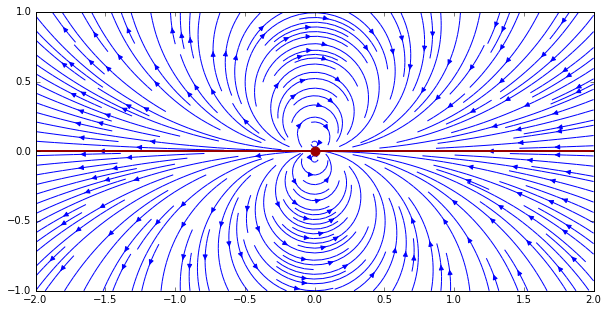

In [7]:
size =10
pyplot.figure(figsize=(size,(y_end-y_start)/(x_end-x_start)*size))
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
pyplot.streamplot(X,Y,u_doublet,v_doublet,density=2, linewidth=1)
pyplot.scatter(x_doublet,y_doublet, color='#990000',s=80)
pyplot.contour(X,Y,psi_doublet,levels=[0.],colors='#990000',linewidths=2,linestyles='solid');

In [28]:
u_inf = 1.0
u_fs = u_inf*numpy.ones((N,N),dtype=float)
v_fs= numpy.zeros((N,N),dtype=float)
psi_fs = u_inf*Y

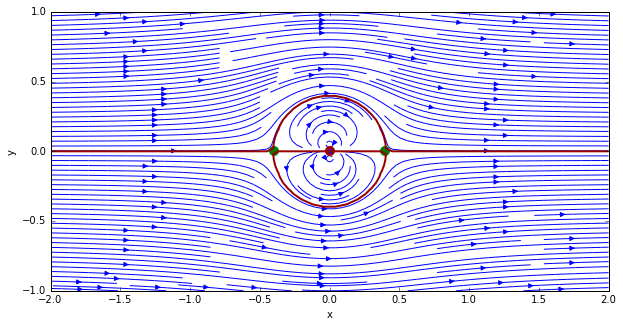

In [29]:
u = u_fs+u_doublet
v = v_fs +v_doublet
psi = psi_fs+psi_doublet

size = 10
pyplot.figure(figsize=(size,(y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
pyplot.streamplot(X,Y,u,v,density=2)
pyplot.contour(X,Y,psi,levels=[0.],colors='#990000',linewidths=2,linestyles='solid')
pyplot.scatter(x_doublet,y_doublet,color='#990000',s=80,marker='o')

x_stag1,y_stag1 = +math.sqrt(kappa/(2*math.pi*u_inf)),0
x_stag2,y_stag2 = -math.sqrt(kappa/(2*math.pi*u_inf)),0
pyplot.scatter([x_stag1,x_stag2],[y_stag1,y_stag2],color='g',s=80,marker='o');


# Challenge Q1
Radius of circle = sqrt(kappa/(2*pi*u_inf)

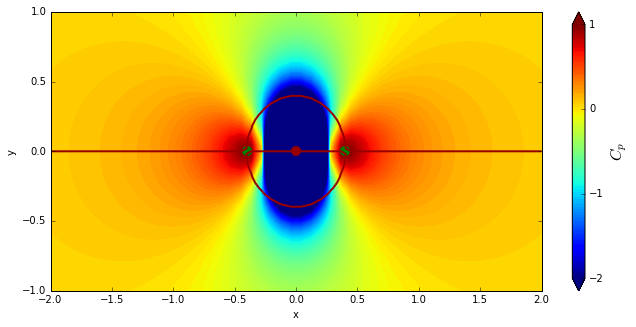

In [32]:
cp=1.0-(u**2+v**2)/u_inf**2
pyplot.figure(figsize=(1.1*size,(y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
contf = pyplot.contourf(X,Y,cp, levels=numpy.linspace(-2.0,1.0,100),extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$',fontsize=16)
cbar.set_ticks([-2.0,-1.0,0.0,1.0])
pyplot.scatter(x_doublet,y_doublet,color='#990000',s=80,marker='o')
pyplot.contour(X,Y,psi,levels=[0.],colors='#990000',linewidths=2,linestyles='solid')
pyplot.scatter([x_stag1,x_stag2],[y_stag1,y_stag2],color='g',s=80,marker='o');

# ch q2
show that cp on surface of cylinder is

cp = 1-4sin^2(theta)

and plot the coefficient of press vs theta